# Clustering Jurnal menggunakan K-Means

In [1]:
# Imports

# Computing
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

#Clustering
from sklearn.cluster import KMeans,SpectralClustering
from yellowbrick.cluster import KElbowVisualizer

#Decomposition
from sklearn.decomposition import PCA, TruncatedSVD

#Text
import unicodedata, re, string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# nltk.download()

In [2]:
#Read the dataset
df=pd.read_csv('detail_manajemen.csv')
df.head()

,judul,abstraksi
0,PENGARUH FAKTOR-FAKTOR PELATIHAN DAN PENGEMBAN...,ABSTRAK\r\...
1,PENGARUH RELATIONSHIP MARKETING TERHADAP LOYAL...,Tujuan penelitian ini adalah untuk mengetahui ...
2,PENGARUH GAYA KEPEMIMPINAN DEMOKRATIK TERHADAP...,NaN
3,Pengukuran Website Quality Pada Situs Sistem A...,Aplikasi nyata pemanfaatan teknologi informasi...
4,Analisis Kinerja Keuangan Perusahaan yang terd...,"Diana Agustini Dewi, 2013. “Analisis Kinerja K..."


In [3]:
df.shape

(120, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   judul      120 non-null    object
 1   abstraksi  119 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [5]:
jurnal = df[['judul', 'abstraksi']].dropna()
jurnal.head()

,judul,abstraksi
0,PENGARUH FAKTOR-FAKTOR PELATIHAN DAN PENGEMBAN...,ABSTRAK\r\...
1,PENGARUH RELATIONSHIP MARKETING TERHADAP LOYAL...,Tujuan penelitian ini adalah untuk mengetahui ...
3,Pengukuran Website Quality Pada Situs Sistem A...,Aplikasi nyata pemanfaatan teknologi informasi...
4,Analisis Kinerja Keuangan Perusahaan yang terd...,"Diana Agustini Dewi, 2013. “Analisis Kinerja K..."
5,PENGARUH STRUKTUR MODAL DAN LIKUIDITAS TERHADA...,Pendekatan penelitian yang digunakan dalam pen...


In [6]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [7]:
def clean_text(text):
    # Mengubah teks menjadi lowercase
    cleaned_text = text.lower()
    # Menghapus angka
    cleaned_text = re.sub(r"\d+", "", cleaned_text)
    # Menghapus white space
    cleaned_text = cleaned_text.strip()
    # Menghapus tanda baca
    cleaned_text = cleaned_text.translate(str.maketrans(string.punctuation, " "*len(string.punctuation), ""))
    # Hapus stopword
    cleaned_text = stopword.remove(cleaned_text)
    # Stemming
    cleaned_text = stemmer.stem(cleaned_text)

    cleaned_text = stemmer.stem(cleaned_text)

    cleaned_text = cleaned_text.replace('\n', ' ')
    cleaned_text = cleaned_text.replace('\r', ' ')
    return cleaned_text

In [8]:
#Tokenize text
jurnal['cleaned_abstraksi'] = jurnal['abstraksi'].apply(clean_text)
jurnal.head()

,judul,abstraksi,cleaned_abstraksi
0,PENGARUH FAKTOR-FAKTOR PELATIHAN DAN PENGEMBAN...,ABSTRAK\r\...,abstrak satiyah pengaruh faktor faktor latih k...
1,PENGARUH RELATIONSHIP MARKETING TERHADAP LOYAL...,Tujuan penelitian ini adalah untuk mengetahui ...,tuju teliti pengaruh variabel relationship mar...
3,Pengukuran Website Quality Pada Situs Sistem A...,Aplikasi nyata pemanfaatan teknologi informasi...,aplikasi manfaat teknologi informasi komunikas...
4,Analisis Kinerja Keuangan Perusahaan yang terd...,"Diana Agustini Dewi, 2013. “Analisis Kinerja K...",ana agustini dewi analisis kerja uang usaha da...
5,PENGARUH STRUKTUR MODAL DAN LIKUIDITAS TERHADA...,Pendekatan penelitian yang digunakan dalam pen...,dekat teliti teliti dekat kuantitatif populasi...


In [9]:
"""Apply the TF_idf vectorizer to get the sparse matrix of the TF_IDF process"""

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(jurnal['cleaned_abstraksi'])


In [10]:
"""A simple view of the feature names"""
print(vectorizer.get_feature_names()[:10])

['aar', 'abc', 'abcs', 'abidin', 'abnormal', 'abnormar', 'abstrak', 'abtrak', 'acak', 'accidental']


C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Dimentional reduction PCA
Principal component analysis (PCA) adalah suatu teknik analisis statistik multivariat. Bisa dibilang, inilah teknik analisis statistik yang paling populer sekarang. Biasanya, PCA digunakan dalam bidang pengenalan pola serta pemrosesan sinyal.

PCA pada dasarnya merupakan dasar dari analisis data multivariat yang menerapkan metode proyeksi. Teknik analisis ini biasanya digunakan untuk meringkas tabel data multivariat dalam skala besar hingga bisa dijadikan kumpulan variabel yang lebih kecil atau indeks ringkasan. Dari situ, kemudian variabel dianalisis untuk mengetahui tren tertentu, klaster variabel, hingga outlier.

In [11]:
# melihat n_component terbaik
# dengan cumulative explained variance
pca = PCA().fit(tfidf.toarray())
cmv = pca.explained_variance_ratio_.cumsum()
print(cmv)
print(cmv.shape)

[0.0454096  0.07911095 0.10255799 0.12510597 0.14725636 0.16717787
 0.18674475 0.20555804 0.2225501  0.23886512 0.2548316  0.26993916
 0.28443973 0.29847928 0.31226707 0.3256089  0.33856201 0.35126803
 0.36380606 0.37601742 0.38773211 0.39923166 0.41058898 0.42184242
 0.43286777 0.44366179 0.45438552 0.46502234 0.47549674 0.48578688
 0.49590527 0.50583578 0.51563214 0.52533007 0.53488291 0.54422533
 0.55338847 0.56228939 0.57114364 0.57987676 0.58854653 0.59715921
 0.6056952  0.61410711 0.6224292  0.63065737 0.63882042 0.64684258
 0.65482861 0.66265281 0.67037837 0.67803744 0.68566499 0.69321225
 0.70070238 0.70810315 0.71544196 0.72267979 0.7297557  0.73678636
 0.74366413 0.75048159 0.75725466 0.76392898 0.77057884 0.77710505
 0.78358478 0.78999958 0.79637899 0.8027048  0.80883813 0.81488497
 0.82070761 0.82644965 0.83211245 0.8377157  0.84329213 0.84873579
 0.85409832 0.85937515 0.86453232 0.86964167 0.87471285 0.87972384
 0.88462873 0.889467   0.89418519 0.89883764 0.90343581 0.9079

# proses reduksi dimensi
pca = PCA(n_components=40)
pca_df = pca.fit_transform(tfidf)
pca_df

## Metode Elbow
Metode Elbow merupakan salah satu metode untuk menentukan jumlah cluster yang tepat melalui persentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik. Jika nilai cluster pertama dengan nilai cluster kedua memberikan sudut dalam grafik atau nilainya mengalami penurunan paling besar maka jumlah nilai cluster tersebut yang tepat. Untuk mendapatkan perbandingannya adalah dengan menghitung Sum of Square Error (SSE) dari masing-masing nilai cluster. Karena semakin besar jumlah nilai cluster K, maka nilai SSE akan semakin kecil.

$$
S S E= \sum_{K=1}^{K} \sum_{X_{i}}\left|x_{i}-c_{k}\right|^{2}
$$

Keterangan:\
${K}$ = _cluster_ ke-c\
$x_{i}$ = jarak data obyek ke-i\
$c_{k}$ = pusat _cluster_ ke-i

C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see

C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see

C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see

C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see

C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see

C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see

C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\Egi Putra Ragil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see

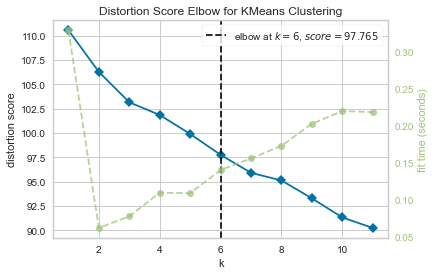

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
"""First cluster using KMeans and run the elbow visualizer to find the best number of clusters"""
modelKm = KMeans(random_state=12)
visualizer = KElbowVisualizer(modelKm, k=(1,12))

visualizer.fit(tfidf)        # Fit the data to the visualizer
visualizer.show() 

## K-Means Clustering
K-Means Clustering merupakan algoritma yang efektif untuk menentukan cluster dalam sekumpulan data, di mana pada algortima tersebut dilakukan analisis kelompok yang mengacu pada pemartisian N objek ke dalam K kelompok (Cluster) berdasarkan nilai rata-rata (means) terdekat. Adapun persamaan yang sering digunakan dalam pemecahan masalah dalam menentukan jarak terdekat adalah persamaan Euclidean berikut :

$$
d(p, q)=\sqrt{\left(p_{1}-q_{1}\right)^{2}+\left(p_{2}-q_{2}\right)^{2}+\left(p_{3}-q_{3}\right)^{2}}
$$

Keterangan:\
_d_ = jarak obyek\
_p_ = data\
_q_ = centroid

[[ 0.20970086  0.11584072]
 [ 0.38906601 -0.18672504]
 [ 0.18133406  0.26547683]]


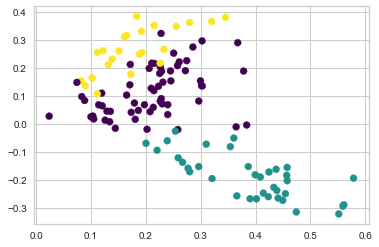

In [13]:
"""Train the Kmeans with the best n of clusters"""
modelKm = KMeans(n_clusters=3, random_state=12)
modelKm.fit(tfidf)
y_kmeans = modelKm.predict(tfidf)

"""Dimensionality reduction used to plot in 2d representation"""
pc=TruncatedSVD(n_components=2)
X_new=pc.fit_transform(tfidf)
centr=pc.transform(modelKm.cluster_centers_)

print(centr)
plt.scatter(X_new[:,0],X_new[:,1],c=y_kmeans, cmap='viridis')